In [66]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../functions')
import animation_functions as anim
from importlib import reload

# /g/

In [43]:
path = '/g/data/ua8/C20C/ARCCSS/NERSC/day/atmos/tas/r1i1p1/'

In [44]:
file = 'tas_Aday_ACCESS1-3_All-Hist_est1_v1-0_r1i1p1_19550101-19791231.nc'

In [46]:
!ls /g/data/ua8/C20C/ARCCSS/NERSC/day/atmos/tas/r1i1p1

tas_Aday_ACCESS1-3_All-Hist_est1_v1-0_r1i1p1_19550101-19791231.nc
tas_Aday_ACCESS1-3_All-Hist_est1_v1-0_r1i1p1_19800101-20041231.nc
tas_Aday_ACCESS1-3_All-Hist_est1_v1-0_r1i1p1_20050101-20131231.nc


In [56]:
ACCESS= xr.open_mfdataset(path + '*.nc')
ACCESS 

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 21550)
Coordinates:
  * time       (time) datetime64[ns] 1955-01-01T12:00:00 ... 2013-12-31T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 1.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(9131, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(9131, 145, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(9131, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(9131, 145, 192), meta=np.ndarray>
Attributes:
    institution:               ARCCSS, ARC Centre of Excellence for Climate S...
    institute_id:              ARCCSS
    source:                    ACCESS1.3 2011. Atmosphere: AGCM v1.0 (N96 gri...
    model_id:                  ACCESS1.3
    forcing:                   GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, ...
    parent_experiment_id:      N/A
    branch_time:               0.0
    contact:                   Contact Andrea Dittus (researcher-id http://or...
    history:                   CMIP5 compliant file produced from raw ACCESS ...
    references:                See http://wiki.csiro.au/confluence/display/AC...
    institute_run_id:          vacvn
    subexperiment:             v1-0
    license:                   http://creativecommons.org/licenses/by-nc-sa/4.0/
    comments:                  Note that there is a downward trend in soil mo...
    frequency:                 day
    creation_date:             2015-10-07T09:17:26Z
    Conventions:               CF-1.4
    project_id:                C20C+ Detection and Attribution Project
    table_id:                  Table day (01 February 2012) 9192275684034c2ba...
    parent_experiment:         N/A
    modeling_realm:            atmos
    cmor_version:              2.9.1
    tracking_id:               4639a4b6-b510-4373-8e7d-fedecbe71ef5
    title:                     C20C All-Hist est1 experiment with ACCESS1.3 m...
    experiment:                est1
    experiment_id:             est1
    experiment_family:         All-Hist
    run_id:                    r1i1p1
    parent_experiment_family:  N/A
    parent_subexperiment:      N/A
    parent_run_id:             N/A

In [57]:
ACCESS_resamp_mean = ACCESS.tas.resample(time = '1Y').mean(dim = 'time')

In [58]:
ACCESS_resamp_mean

<xarray.DataArray 'tas' (time: 59, lat: 145, lon: 192)>
dask.array<stack, shape=(59, 145, 192), dtype=float32, chunksize=(1, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1955-12-31 1956-12-31 ... 2013-12-31
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 1.5

In [70]:
anim = reload(anim)
anim.unset_animate_plot(ACCESS_resamp_mean, name = 'ACCESS_resmaple_mean')

<img src = "ACCESS_resmaple_mean.gif">

In [74]:
ACCESS_climatology = ACCESS.where(ACCESS.time.dt.year.isin(np.arange(1960,1990))).mean(dim = 'time')

In [75]:
ACCESS_climatology 

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 145, lon: 192)
Coordinates:
  * lat       (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height    float64 1.5
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 dask.array<chunksize=(145, 2), meta=np.ndarray>
    lon_bnds  (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas       (lat, lon) float32 dask.array<chunksize=(145, 192), meta=np.ndarray>

In [76]:
ACCESS_resamp_mean

<xarray.DataArray 'tas' (time: 59, lat: 145, lon: 192)>
dask.array<stack, shape=(59, 145, 192), dtype=float32, chunksize=(1, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1955-12-31 1956-12-31 ... 2013-12-31
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 1.5

In [77]:
ACCESS_anomaly = ACCESS_resamp_mean - ACCESS_climatology 

In [78]:
ACCESS_anomaly 

,Array,Chunk
Bytes,26.28 MB,445.44 kB
Shape,"(59, 145, 192, 2)","(1, 145, 192, 2)"
Count,450 Tasks,59 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,26.28 MB,445.44 kB
Shape,"(59, 145, 192, 2)","(1, 145, 192, 2)"
Count,449 Tasks,59 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [85]:
ACCESS_anomaly  = ACCESS_anomaly.compute()

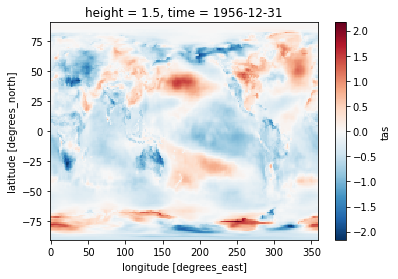

In [87]:
ACCESS_anomaly.tas.isel(time = 1).plot()

In [88]:
anim = reload(anim)
anim.unset_animate_plot(ACCESS_anomaly.tas, name = 'ACCESS_anom2')

<img src = "ACCESS_anom2.gif">